In [1]:
import numpy as np
from fairmotion.ops import conversions

from numpy.linalg import norm

def cosine_similarity(matrix1, matrix2):
    dot_product = np.dot(matrix1.flatten(), matrix2.flatten())
    norm_matrix1 = norm(matrix1)
    norm_matrix2 = norm(matrix2)
    similarity = dot_product / (norm_matrix1 * norm_matrix2)
    return similarity

In [77]:
root_acc = np.array([21.0, 964.0, -23.0], dtype=np.float32)
root_quat = np.array([0.647, 0.669, 0.256, 0.262], dtype=np.float32)

root_acc, root_quat

(array([ 21., 964., -23.], dtype=float32),
 array([0.647, 0.669, 0.256, 0.262], dtype=float32))

In [78]:
coor_acc = np.array([  19.,  -14., 1015.], dtype=np.float32)
coor_quat = np.array([0.883, -0.012, -0.006, -0.469], dtype=np.float32)

coor_acc, coor_quat

(array([  19.,  -14., 1015.], dtype=float32),
 array([ 0.883, -0.012, -0.006, -0.469], dtype=float32))

# Sample

In [60]:
root_acc = np.array([0.0, 1.0, 0.0], dtype=np.float32)
root_quat = np.array([1, 1, 0.0, 0.0], dtype=np.float32)/(2**0.5)

root_acc, root_quat

(array([0., 1., 0.], dtype=float32),
 array([0.70710677, 0.70710677, 0.        , 0.        ], dtype=float32))

In [61]:
coor_acc = np.array([0.0 ,  0.0,  1.0 ], dtype=np.float32)
coor_quat = np.array([1, 0.0, 0.0, 1], dtype=np.float32)/(2**0.5)

coor_acc, coor_quat

(array([0., 0., 1.], dtype=float32),
 array([0.70710677, 0.        , 0.        , 0.70710677], dtype=float32))

In [79]:
root_rot = conversions.Q2R(root_quat)
print(root_rot)

coor_rot = conversions.Q2R(coor_quat)
print(coor_rot)


[[-0.02583499  0.73128606  0.68158144]
 [ 0.99948018  0.03204879  0.00349881]
 [-0.01928523  0.68131753 -0.7317339 ]]
[[ 9.99639939e-01 -2.68245599e-02  6.60112285e-04]
 [-1.55666461e-02 -5.59715147e-01  8.28538855e-01]
 [-2.18557153e-02 -8.28250806e-01 -5.59931184e-01]]


In [23]:
deg = np.pi / 180

In [81]:
rotation = conversions.E2R(np.array([90*deg, 0, -90*deg]))
print(np.round(rotation))

print(cosine_similarity(root_rot, coor_rot))
print("Rotation")
print(cosine_similarity(root_rot, R.dot(coor_rot)))
print(root_rot, '\n', R.dot(coor_rot))
print(cosine_similarity(R.dot(root_rot), (coor_rot)))
print(np.round(root_rot - R.dot(coor_rot)))
print("Acc")
print(cosine_similarity(root_acc, R.dot(coor_acc)))
print(cosine_similarity(R.dot(root_acc), (coor_acc)))

[[ 0.  0. -1.]
 [-1.  0. -0.]
 [ 0.  1.  0.]]
-0.07658323694605802
Rotation
0.9999999999999999
[[-0.02583499  0.73128606  0.68158144]
 [ 0.99948018  0.03204879  0.00349881]
 [-0.01928523  0.68131753 -0.7317339 ]] 
 [[-0.02583499  0.73128606  0.68158144]
 [ 0.99948018  0.03204879  0.00349881]
 [-0.01928523  0.68131753 -0.7317339 ]]
0.17076145043552426
[[-0. -0. -0.]
 [ 0.  0. -0.]
 [-0.  0.  0.]]
Acc
-0.04939088501011312
-0.9802430182357759


: 

In [2]:
conversions.R2E(np.linalg.inv(R),  order='zxy')

NameError: name 'R' is not defined

In [3]:
A = np.array([[0, 0, -1],
              [1, 0, 0],
              [0, 1, 0]])
B = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])

In [4]:
R = root_rot.dot(np.linalg.inv(coor_rot))
print(R)
print(np.round(R, 2))

NameError: name 'root_rot' is not defined

In [5]:
R = A.dot(np.linalg.inv(B))
R


array([[ 0.,  0., -1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

In [45]:
R.dot(np.array([0, 1, 0]))

array([0., 0., 1.])

In [ ]:
[
    {"id": 0, "acc": [X, Y, Z], "quat": [W, X, Y, Z]},
    {"id": 1, "acc": [X, Y, Z], "quat": [W, X, Y, Z]},
    {"id": 2, "acc": [X, Y, Z], "quat": [W, X, Y, Z]},
    {"id": 3, "acc": [X, Y, Z], "quat": [W, X, Y, Z]},
    {"id": 4, "acc": [X, Y, Z], "quat": [W, X, Y, Z]},
    {"id": 5, "acc": [X, Y, Z], "quat": [W, X, Y, Z]},
]

inputs = [
    R01, R02, ... R09,
    ...
    R51, R52, ... R59,
    X0, Y1, Z1,
    ...
    X5, Y5, Z5,
]

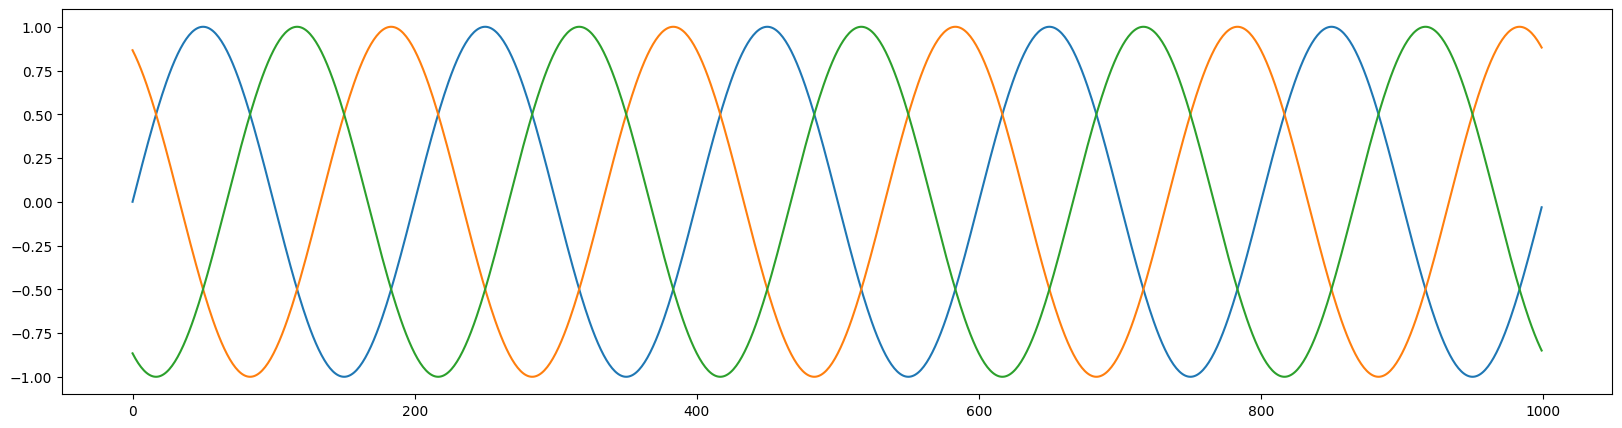

In [4]:
import numpy as np
import math
from matplotlib import pyplot as plt

A, B, C = [], [], []
for i in range(1000):
    pi = i*np.pi/100
    A.append(np.sin(pi))
    B.append(np.sin(pi+np.pi*2/3))
    C.append(np.sin(pi-np.pi*2/3))

plt.figure(figsize=(20, 5))
plt.plot(A)
plt.plot(B)
plt.plot(C)
plt.show()